# Week 1 - Preprocessing

## Please run the cells of the notebook as you get to them while reading

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import re
import matplotlib as plt

# 1. Lesson on how to search for Python commands

Let's consider a few possible ways to learn about Python programming.  Let's suppose you want to learn how to produce a short summary of the information in your DataFrame.

1. Your **instructor** could provide the information.

You could be provided with a lesson about functions like info() and describe().  If you have a pandas DataFrame called df, then you can summarize its contents using df.info() or df.describe().  df.info() provides a list of column names with their counts and data types.  df.describe() will provide information such as the mean, min, max, standard deviation, and quantiles.  Thus:

In [101]:
df = pd.DataFrame([[1, 4], [2, 5], [3, 6], [4, 7]], columns = ['A', 'B'])
df.describe()

,A,B
count,4.000000,4.000000
mean,2.500000,5.500000
std,1.290994,1.290994
min,1.000000,4.000000
25%,1.750000,4.750000
50%,2.500000,5.500000
75%,3.250000,6.250000
max,4.000000,7.000000


In [102]:
df['A'].std()

np.float64(1.2909944487358056)

In this describe() result, we see that the two columns A and B each have four elements.  The means and other statistics are shown.

2. You could look up the information on **Google**.

If I Google the question "how do I briefly summarize the contents of a dataframe using Python," I receive the following link (among others), which discusses the describe() command mentioned above:

https://www.w3schools.com/python/pandas/ref_df_describe.asp

It also provide the complete usage information:

dataframe.describe(percentiles, include, exclude, datetime_is_numeric)

It explains that "percentiles" is set by default to [0.25, 0.5, 0.75] but we could change that.  Let's try it!  Since there are three intervals here rather than four, it might be more meaningful to ask about a 33rd and 67th percentile rather than 25, 50, and 75.  We can use 1/3 for 0.33 and 2/3 for 0.67 to get the exact percentile values.

In [103]:
df = pd.DataFrame([[1, 4], [2, 5], [3, 6], [4, 7]], columns = ['A', 'B'])
df.describe(percentiles = [1/3, 2/3])

,A,B
count,4.000000,4.000000
mean,2.500000,5.500000
std,1.290994,1.290994
min,1.000000,4.000000
33.3%,2.000000,5.000000
50%,2.500000,5.500000
66.7%,3.000000,6.000000
max,4.000000,7.000000


Apparently, the 50% value (the median) stays even though we did not specifically request it.

3. You could look up the official **documentation**.

Now that we know we want the pandas describe() function, try Googling: pandas documentation describe.

Here is the general documentation page for pandas:

https://pandas.pydata.org/docs/index.html

Here is the specific page for the describe() function:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

When I look at this, it appears to be showing the most recent (currently 2.2) version of pandas; this is shown in the upper right corner.

4. You could also ask **ChatGPT**.

Let's try it.  ChatGPT, "how do I briefly summarize the contents of a dataframe using Python"

When I do this, ChatGPT mentions describe() among other options, but does not go into detail.  However, I could ask it.  ChatGPT, "tell me more about describe() in Python for summarizing dataframes."

Then, I get a good explanation of describe(), although it does not mention the percentiles option.  One advantage of using Google or the documentation in addition of ChatGPT is that these sources may provide interesting information that does not directly answer our question.  Thus, we might not have known about the various arguments, such as percentiles, if we only used ChatGPT.  A second issue is that ChatGPT sometimes hallucinates (it makes up information).  In general, by examining multiple sources - Google, documentation, and ChatGPT - we can get more information.

# 2. Weekly graph question

In Storytelling With Data, on page 1: examine the pie chart graph in the upper left corner of the graphs.  Please write a short explanation of the pros and cons of this graph.  What do you think of the choice of pie chart as a format?  The color scheme?  The legend?  The title?  How would you draw it differently if you were creating this graph?

<b>Answer</b></br>
The Survey Results pie chart is a visual representation of a survey being done but it does not tell us the whole story. Pie Charts are used to show percentages distribution of the whole population. The color scheme is okay but I would use more contrasting colors than using different shades of blue in adjucent pies. The title should tell what is this survey about. So in my opinion, the graph is not very useful to understand the context or the story behind the chart.

If I do not have any other information than what is shown in the page 1 pie chart, I would not have any better way to represent it but I might prefer a barchart to show the count alongside the pie chart.

# 3. Homework - Bank Customers

I will begin by creating a file for you to analyze.  I will show you all of the steps I used to create it.  Please run this code in order to create and save a file about bank customers.

### The numbered problems are for you to solve.

In [104]:
num_customers = 100
np.random.seed(0)

In [105]:
df_bank = pd.DataFrame(columns = ["CustomerID"])

In [106]:
df_bank["CustomerID"] = [str(x) for x in np.arange(num_customers)]

In [107]:
start = datetime(1950, 1, 1)
end = datetime(2024, 1, 1)
numdays = (end - start).days
random_days = np.random.randint(0, numdays, size = num_customers)
df_bank["BirthDate"] = start + pd.to_timedelta(random_days, unit='D')
df_bank["BirthDate"] = df_bank["BirthDate"].dt.strftime('%Y-%m-%d')

In [108]:
random_days

array([ 2732, 10799,  9845, 19648, 13123, 21243,  9225, 24275, 20757,
       22258, 14116, 14935, 15430, 15832,  6744, 19852, 14650, 17089,
       18983, 10327, 18606, 24152,  2897, 26277, 16921,  6216,  6921,
        6036,  2163,  5072,  4851,  7877, 18430,  1871,  7599,  2496,
       15186, 24675, 10200,   755,   797, 17043,  3219, 15246, 24999,
       23840, 16321, 19721, 19129, 21119,  8736, 23071, 17098, 18676,
       24727, 11723, 11122, 17591, 22556, 25378, 10368, 26752, 26532,
       23605,  6021, 20006,  3560, 25332, 12676, 18025, 13754, 14879,
       21368, 20737, 26681, 14627, 12134, 15115,  8622, 23634, 20571,
       27022, 19043,  9781, 19340, 16298, 12372, 18635,  4420, 13062,
        7108, 17455, 14324,  5251,  7012,  9396, 14312,  3918,  9359,
       18068], dtype=int32)

In [109]:
def make_ssn_string(num):
    ssn_str = f'{num:09}'
    return ssn_str[0:3] + "-" + ssn_str[3:5] + "-" + ssn_str[5:9]
ssn_vector_func = np.vectorize(make_ssn_string)
df_bank["SSN"] = ssn_vector_func(np.random.randint(0, 999999999, size = num_customers))

In [110]:
df_bank["AccountID"] = np.random.randint(0, num_customers, size = num_customers)

In [111]:
random_days = np.random.randint(0, 365 * 80, size = num_customers)
df_bank["AccountOpened"] = (pd.to_datetime(df_bank["BirthDate"]) + pd.to_timedelta(random_days, unit='D')).dt.strftime('%Y-%m-%d')

In [112]:
df_bank.loc[0, "BirthDate"] = "1980"
df_bank.loc[1, "BirthDate"] = "no date"

In [113]:
df_bank

,CustomerID,BirthDate,SSN,AccountID,AccountOpened
0,0,1980,530-47-1866,4,1959-12-06
1,1,no date,682-76-9175,67,2039-02-20
2,2,1976-12-15,377-98-9839,11,2019-03-25
3,3,2003-10-18,474-05-7613,86,2004-03-02
4,4,1985-12-06,750-55-5509,77,2059-05-05
...,...,...,...,...,...
95,95,1975-09-23,607-97-1651,36,2011-07-24
96,96,1989-03-09,870-80-0364,0,2054-11-01
97,97,1960-09-23,773-33-2797,75,1993-09-16
98,98,1975-08-17,846-64-7054,34,2032-12-25


In [114]:
df_bank.loc[2, "AccountID"] = np.nan

In [115]:
df_bank

,CustomerID,BirthDate,SSN,AccountID,AccountOpened
0,0,1980,530-47-1866,4.0,1959-12-06
1,1,no date,682-76-9175,67.0,2039-02-20
2,2,1976-12-15,377-98-9839,NaN,2019-03-25
3,3,2003-10-18,474-05-7613,86.0,2004-03-02
4,4,1985-12-06,750-55-5509,77.0,2059-05-05
...,...,...,...,...,...
95,95,1975-09-23,607-97-1651,36.0,2011-07-24
96,96,1989-03-09,870-80-0364,0.0,2054-11-01
97,97,1960-09-23,773-33-2797,75.0,1993-09-16
98,98,1975-08-17,846-64-7054,34.0,2032-12-25


In [116]:
df_bank["AccountType"] = np.random.choice(["checking", "savings", "cd"], size = num_customers)

Load the bank_customers.csv file.  (There is no practical reason to save it, then load it - we're just demonstrating how this would be done.)
I am calling the loaded df by a new name, df_bank_loaded, to make clear why it's not the same variable as the old df.  Of course, in actuality the two contain the exact same data!  But it's good to get in the habit of naming things carefully.

In [117]:
df_bank.loc[num_customers - 1] = df.loc[0]
df_bank.to_csv("bank_customers.csv", index=False)

In [118]:
df_bank_loaded = pd.read_csv("bank_customers.csv")

1. Use describe() and info() to analyze the data.   Also, look at the first few rows.

Suggested Google Search or ChatGPT prompt: "how do I use the describe function in python"

Example Google result: https://www.w3schools.com/python/pandas/ref_df_describe.asp

In [119]:
# The first few rows
df_bank_loaded.iloc[0:5]

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
0,0.0,1980,530-47-1866,4.0,1959-12-06,checking
1,1.0,no date,682-76-9175,67.0,2039-02-20,cd
2,2.0,1976-12-15,377-98-9839,NaN,2019-03-25,checking
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd


If you used describe() and info(), you now know that BirthDate and AccountOpened are strings.  But we want them to be dates.  Let's convert them to dates (or Timestamps in pandas).  When we try this, we get a ValueError.

In [120]:
try:
    df_bank_loaded["BirthDate"] = pd.to_datetime(df_bank_loaded["BirthDate"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError for BirthDate: {e}")

ValueError for BirthDate: time data "1980" doesn't match format "%Y-%m-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


In [121]:
try:
    df_bank_loaded["AccountOpened"] = pd.to_datetime(df_bank_loaded["AccountOpened"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError for AccountOpened: {e}")

It worked!


The simple way to fix this is to remove the rows that have bad dates for BirthDate.  I Googled:

"How to remove rows from a dataframe that have poorly formatted dates using python"

https://stackoverflow.com/questions/21556744/pandas-remove-rows-whose-date-does-not-follow-specified-format

This recommends that I verify that the date is a string of length 10, because YYYY-MM-DD has that length:

df1\[df1.BirthDate.str.len() !=10]

In [122]:
len(df_bank_loaded[df_bank_loaded.BirthDate.str.len() == 10])

97

In [123]:
df_bank_loaded[df_bank_loaded.BirthDate.str.len() != 10].iloc[0:5]

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
0,0.0,1980,530-47-1866,4.0,1959-12-06,checking
1,1.0,no date,682-76-9175,67.0,2039-02-20,cd
99,NaN,NaN,NaN,NaN,NaT,NaN


Now we can make this permanent, creating a new DataFrame df_bank_datefix.
I am making a copy in order to ensure that df_bank_datefix is a new DataFrame rather than being a slice of the old one.

In [124]:
df_bank_datefix = df_bank_loaded[df_bank_loaded.BirthDate.str.len() == 10].copy()

Test again:

In [125]:
try:
    df_bank_datefix["BirthDate"] = pd.to_datetime(df_bank_datefix["BirthDate"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError: {e}")

It worked!


2. To check that it worked, use a summary function that will tell you if the BirthDate field is now a datetime type

In [126]:
df_bank_datefix.columns

Index(['CustomerID', 'BirthDate', 'SSN', 'AccountID', 'AccountOpened',
       'AccountType'],
      dtype='object')

In [127]:
# Checked in ChatGPT :summary function to show a field is datetime
    
from pandas.api.types import is_datetime64_any_dtype
field_name='BirthDate'
if is_datetime64_any_dtype(df_bank_datefix[field_name]):
   print(f"Column '{field_name}' is of datetime type.")
else:
   print(f"Column '{field_name}' is NOT of datetime type.")


Column 'BirthDate' is of datetime type.


3. Check whether there are any null values in the DataFrame.  If so, remove those rows or (if you prefer) fill in the value with an appropriate number.

First try at a Google search or ChatGPT prompt: "how do I find out if there are any null values in a pandas DataFrame?"

This page gives an answer.  Unfortunately, it took my request too literally: it tells me only if there are any, and not which rows have them.  On reflection, that's not really what I want - I think I asked the wrong question.  I want to see the rows, not just _whether_ there are any.

https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe

ChatGPT likewise doesn't give the answer I want - because I asked the wrong question.

Next try at a Google search or ChatGPT prompt: "how do I check which rows have null values in a pandas DataFrame?"

This page gives an answer:

https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe

ChatGPT also gives a good answer.  I recommend looking at both of them!

Now try it on your own:

Suggested Google search or ChatGPT prompt: "how do I remove rows with null values in a pandas DataFrame?"

Suggested Google search or ChatGPT prompt: "how do I fill in null values in a pandas DataFrame?"

In [128]:
#ChatGPT : how to find out if there are any null values in a pandas DataFrame?

df_bank_datefix.info() # gives total row count and columnwise Not Null Counts 

print("Null exists?",df_bank_datefix.isna().any().any()) # True if any null exists

print(df_bank_datefix.isna().sum())# Count null values in each column

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 2 to 98
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CustomerID     97 non-null     float64       
 1   BirthDate      97 non-null     datetime64[ns]
 2   SSN            97 non-null     object        
 3   AccountID      96 non-null     float64       
 4   AccountOpened  97 non-null     datetime64[ns]
 5   AccountType    97 non-null     object        
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 5.3+ KB
Null exists? True
CustomerID       0
BirthDate        0
SSN              0
AccountID        1
AccountOpened    0
AccountType      0
dtype: int64


In [129]:
#ChatGPT :how do I check which rows have null values in a pandas DataFrame?
df_bank_datefix[df_bank_datefix.isna().any(axis=1)] #finds rows with null values


,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
2,2.0,1976-12-15,377-98-9839,NaN,2019-03-25,checking


In [130]:
#ChatGPT: how do I remove rows with null values in a pandas DataFrame?

In [131]:
df_bank_datefix.reset_index()

,index,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
0,2,2.0,1976-12-15,377-98-9839,NaN,2019-03-25,checking
1,3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd
2,4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd
3,5,5.0,2008-02-29,671-43-0485,75.0,2025-05-03,checking
4,6,6.0,1975-04-05,288-62-9296,56.0,2048-09-21,savings
...,...,...,...,...,...,...,...
92,94,94.0,1969-03-14,958-12-8308,5.0,2037-04-03,savings
93,95,95.0,1975-09-23,607-97-1651,36.0,2011-07-24,checking
94,96,96.0,1989-03-09,870-80-0364,0.0,2054-11-01,cd
95,97,97.0,1960-09-23,773-33-2797,75.0,1993-09-16,cd


In [132]:
df_bank_datefix.columns

Index(['CustomerID', 'BirthDate', 'SSN', 'AccountID', 'AccountOpened',
       'AccountType'],
      dtype='object')

In [133]:
#ChatGPT:how do I fill in null values in a pandas DataFrame?
df_filled = df_bank_datefix.fillna(method='bfill') #Use method='bfill' to propagate the next valid value backward.
print(df_filled)

    CustomerID  BirthDate          SSN  AccountID AccountOpened AccountType
2          2.0 1976-12-15  377-98-9839       86.0    2019-03-25    checking
3          3.0 2003-10-18  474-05-7613       86.0    2004-03-02          cd
4          4.0 1985-12-06  750-55-5509       77.0    2059-05-05          cd
5          5.0 2008-02-29  671-43-0485       75.0    2025-05-03    checking
6          6.0 1975-04-05  288-62-9296       56.0    2048-09-21     savings
..         ...        ...          ...        ...           ...         ...
94        94.0 1969-03-14  958-12-8308        5.0    2037-04-03     savings
95        95.0 1975-09-23  607-97-1651       36.0    2011-07-24    checking
96        96.0 1989-03-09  870-80-0364        0.0    2054-11-01          cd
97        97.0 1960-09-23  773-33-2797       75.0    1993-09-16          cd
98        98.0 1975-08-17  846-64-7054       34.0    2032-12-25     savings

[97 rows x 6 columns]


C:\Users\dganguli\AppData\Local\Temp\ipykernel_21692\2884657556.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_bank_datefix.fillna(method='bfill') #Use method='bfill' to propagate the next valid value backward.


4. Find out if there are any duplicate rows (two rows exactly the same).  List their row numbers.  Then remove the duplicates

Suggested Google search or ChatGPT prompt: "how can I find out if there are any duplicate rows in a DataFrame using Python"

Again, Google provides me with a page that addresses the question:

https://saturncloud.io/blog/how-to-find-all-duplicate-rows-in-a-pandas-dataframe/

To remove the duplicates, do this search: "how can I remove the duplicate rows in a DataFrame using Python"

This leads me to the following documentation.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

In [134]:
#ChatGPT:how can I find out if there are any duplicate rows in a DataFrame using Python?

num_duplicate=df_bank_datefix.duplicated().sum()
print(f'num_duplicate={num_duplicate}')

has_duplicates = df_bank_datefix.duplicated().any()
print(f'has_duplicates? {has_duplicates}')  # Output: True

#No duplicates found

#finding row numbers of duplicates
duplicate_index=df_bank_datefix[df_bank_datefix.duplicated()].index
print(f'duplicate_index={duplicate_index}')

num_duplicate=0
has_duplicates? False
duplicate_index=Index([], dtype='int64')


In [135]:
#Another way of fiding duplicates
df_bank_datefix[df_bank_datefix.duplicated()==True]

#No records returned

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType


5. Check whether the customers all have unique AccountIDs.  If not, provide the first example of a non-unique AccountId.

Suggested Google search or ChatGPT prompt: "how can I find the first non-unique item from a pandas Series in python"

By the way: why didn't I ask the question "how can I check whether the customers all have unique AccountIDs"?

The problem would be that Google and ChatGPT don't know what "customers" you are talking about.  It's important to understand that the AccountIDs are a column of a DataFrame, and as such they are a Series.  Therefore, we should use the correct vocabulary and ask about a Series.  If you mess up and ask about a "list" instead of a Series, you _might_ get an answer that still works.  But it's better to get the vocabularly right.

It's important to add "in python" because this task could be performed in many languages.

ChatGPT gave me this suggestion: data[data.isin(data[data.duplicated()])].iloc[0]
However, ChatGPT did not explain how this code worked and even claimed (falsely) that it was going to use the value_counts() function in the solution.  So although the code is correct, I personally found ChatGPT's answer very confusing.  You could, perhaps, ask ChatGPT to explain further how this code works.

ChatGPT, "How does this code work: data[data.isin(data[data.duplicated()])].iloc[0]"

On the other hand, Google leads me to the documentation for the duplicated() function:

https://pandas.pydata.org/docs/reference/api/pandas.Series.duplicated.html

Here, I can see that when I really need is data.duplicated(keep = False), where "data" should be the Series in question.  However, this just gives me a Series of boolean values indicating which ones are duplicates.  I have to somehow know that extracting the numerical values instead of a Series of booleans involves boolean indexing: data\[data.duplicated(keep = False)].

So as usual, I'd suggest that a combination of Google, documentation, and ChatGPT will give you the best information.

In [136]:
#ChatGPT: how can I find the first non-unique item from a pandas Series in python?

# The above search does not specify the column name therefore, I had to tweak it to ask "how to find first non-unique 'AccountID'?"

# Find the first non-unique AccountID
if df_bank_datefix['AccountID'].duplicated(keep=False).any():
    first_non_unique = df_bank_datefix['AccountID'][df_bank_datefix['AccountID'].duplicated(keep=False)].iloc[0]
    first_non_unique_index = df_bank_datefix['AccountID'][df_bank_datefix['AccountID'].duplicated(keep=False)].index[0]
    print(f"First non-unique AccountID: {first_non_unique}")
    print(f"First non-unique AccountID Index: {first_non_unique_index}")
else:
    print("No non-unique AccountID found.")

First non-unique AccountID: 86.0
First non-unique AccountID Index: 3


In [137]:
df_bank_datefix

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
2,2.0,1976-12-15,377-98-9839,NaN,2019-03-25,checking
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd
5,5.0,2008-02-29,671-43-0485,75.0,2025-05-03,checking
6,6.0,1975-04-05,288-62-9296,56.0,2048-09-21,savings
...,...,...,...,...,...,...
94,94.0,1969-03-14,958-12-8308,5.0,2037-04-03,savings
95,95.0,1975-09-23,607-97-1651,36.0,2011-07-24,checking
96,96.0,1989-03-09,870-80-0364,0.0,2054-11-01,cd
97,97.0,1960-09-23,773-33-2797,75.0,1993-09-16,cd


In [138]:
df_bank_datefix.describe() #to check how many not null account id present
non_unique_accid=df_bank_datefix['AccountID'].nunique() # count number of non unique account ids
print(f'non_unique_accid count={non_unique_accid}')

non_unique_accid count=63


In [139]:
# another great method to easily find the count of duplicates or non-unique values
non_unique_rows = df_bank_datefix[df_bank_datefix['AccountID'].duplicated(keep=False)]
print(non_unique_rows)

    CustomerID  BirthDate          SSN  AccountID AccountOpened AccountType
3          3.0 2003-10-18  474-05-7613       86.0    2004-03-02          cd
5          5.0 2008-02-29  671-43-0485       75.0    2025-05-03    checking
6          6.0 1975-04-05  288-62-9296       56.0    2048-09-21     savings
8          8.0 2006-10-31  121-74-2917       24.0    2046-11-17     savings
9          9.0 2010-12-10  844-31-4793       29.0    2048-06-01    checking
..         ...        ...          ...        ...           ...         ...
91        91.0 1997-10-16  627-23-0106       34.0    2027-10-14    checking
92        92.0 1989-03-21  310-31-9554       88.0    1991-03-23     savings
93        93.0 1964-05-18  596-66-1496       33.0    2023-01-01    checking
97        97.0 1960-09-23  773-33-2797       75.0    1993-09-16          cd
98        98.0 1975-08-17  846-64-7054       34.0    2032-12-25     savings

[62 rows x 6 columns]


6. Count how many distinct AccountIDs there are.

Suggested Google search or ChatGPT prompt: "how can I find out how many distinct items there are in a pandas Series using python"

This time Google provides me with a page that's specifically made to answer this question:

https://www.geeksforgeeks.org/how-to-count-distinct-values-of-a-pandas-dataframe-column/

In [140]:
df_bank_datefix['AccountID'].unique().size #gives total number of unique values in the AccountID series

64

7. Remove the duplicate AccountIDs so that each AccountID appears only once.

This will involve using data.duplicated() but this time without keep = False.  We don't want to drop all duplicates; we want to leave one example of each value.

In [141]:
df_bank_datefix

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
2,2.0,1976-12-15,377-98-9839,NaN,2019-03-25,checking
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd
5,5.0,2008-02-29,671-43-0485,75.0,2025-05-03,checking
6,6.0,1975-04-05,288-62-9296,56.0,2048-09-21,savings
...,...,...,...,...,...,...
94,94.0,1969-03-14,958-12-8308,5.0,2037-04-03,savings
95,95.0,1975-09-23,607-97-1651,36.0,2011-07-24,checking
96,96.0,1989-03-09,870-80-0364,0.0,2054-11-01,cd
97,97.0,1960-09-23,773-33-2797,75.0,1993-09-16,cd


In [142]:
df_bank_datefix_bkp=df_bank_datefix.copy()

In [143]:
df_bank_datefix_bkp

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
2,2.0,1976-12-15,377-98-9839,NaN,2019-03-25,checking
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd
5,5.0,2008-02-29,671-43-0485,75.0,2025-05-03,checking
6,6.0,1975-04-05,288-62-9296,56.0,2048-09-21,savings
...,...,...,...,...,...,...
94,94.0,1969-03-14,958-12-8308,5.0,2037-04-03,savings
95,95.0,1975-09-23,607-97-1651,36.0,2011-07-24,checking
96,96.0,1989-03-09,870-80-0364,0.0,2054-11-01,cd
97,97.0,1960-09-23,773-33-2797,75.0,1993-09-16,cd


In [144]:
#There are several ways to delete duplicates from the dataframe. Below is using only 'drop' method. Another way is to use 'drop_duplicate' method
df_bank_datefix.drop(df_bank_datefix[df_bank_datefix['AccountID'].duplicated()].index,inplace=True)

In [145]:
df_bank_datefix

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
2,2.0,1976-12-15,377-98-9839,NaN,2019-03-25,checking
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd
5,5.0,2008-02-29,671-43-0485,75.0,2025-05-03,checking
6,6.0,1975-04-05,288-62-9296,56.0,2048-09-21,savings
...,...,...,...,...,...,...
88,88.0,1962-02-07,327-09-3267,97.0,1989-10-03,cd
90,90.0,1969-06-18,395-31-7064,34.0,2010-12-28,checking
94,94.0,1969-03-14,958-12-8308,5.0,2037-04-03,savings
95,95.0,1975-09-23,607-97-1651,36.0,2011-07-24,checking


8. What are the mean, median, and mode customer age in years?  (Rounding down to the next lower age.)
Are there any outliers?  (Customers with very large or very small ages, compared with the other ages?)

Suggested Google search or ChatGPT prompt: "how can I find out the mean, median, and mode of a pandas Series"

In [99]:
#Add Age column in the DataFrame
df_bank_datefix['BirthDate']=pd.to_datetime(df_bank_datefix['BirthDate'])
df_bank_datefix['BirthDate']
current_date=datetime.now()
df_bank_datefix['Age'] = df_bank_datefix['BirthDate'].apply(lambda x:(current_date-x).days//365) # // floating part is truncated. Rounding down to lower age
print(df_bank_datefix)
df_bank_datefix['Age'].describe() #describe gives mean,median and mode of customer age in years

    CustomerID  BirthDate          SSN  AccountID AccountOpened AccountType  \
2          2.0 1976-12-15  377-98-9839        NaN    2019-03-25    checking   
3          3.0 2003-10-18  474-05-7613       86.0    2004-03-02          cd   
4          4.0 1985-12-06  750-55-5509       77.0    2059-05-05          cd   
5          5.0 2008-02-29  671-43-0485       75.0    2025-05-03    checking   
6          6.0 1975-04-05  288-62-9296       56.0    2048-09-21     savings   
..         ...        ...          ...        ...           ...         ...   
88        88.0 1962-02-07  327-09-3267       97.0    1989-10-03          cd   
90        90.0 1969-06-18  395-31-7064       34.0    2010-12-28    checking   
94        94.0 1969-03-14  958-12-8308        5.0    2037-04-03     savings   
95        95.0 1975-09-23  607-97-1651       36.0    2011-07-24    checking   
96        96.0 1989-03-09  870-80-0364        0.0    2054-11-01          cd   

    Age  
2    48  
3    21  
4    39  
5    16  
6

count    64.000000
mean     36.921875
std      19.751877
min       1.000000
25%      22.750000
50%      34.000000
75%      54.250000
max      73.000000
Name: Age, dtype: float64

In [167]:
#Finding out outliers in the Age Dataframe Series

Q1=df_bank_datefix['Age'].quantile(.25) 
Q3=df_bank_datefix['Age'].quantile(.75)

IQR=Q3-Q1
print(f'IQR is {IQR}')

Lower_Bound=Q1-1.5*IQR
Uppper_Bound=Q3+1.5*IQR

print(f'lower_bound is {Lower_Bound} and upper bound is {Uppper_Bound}')
print(f'Max age is {df_bank_datefix['Age'].max()} and Min age is {df_bank_datefix['Age'].min()}')

outliers=df_bank_datefix[(df_bank_datefix['Age']<Lower_Bound) | (df_bank_datefix['Age']>Uppper_Bound)]

print(f'Outlier is : {outliers}')

IQR is 31.5
lower_bound is -24.5 and upper bound is 101.5
Max age is 73 and Min age is 1
Outlier is : Empty DataFrame
Columns: [CustomerID, BirthDate, SSN, AccountID, AccountOpened, AccountType, Age]
Index: []


In [ ]:
#ChatGPT:how can I find out if there are any duplicate rows in a DataFrame using Python?

num_duplicate=df_bank_datefix.duplicated().sum()
print(f'num_duplicate={num_duplicate}')

has_duplicates = df_bank_datefix.duplicated().any()
print(f'has_duplicates? {has_duplicates}')  # Output: True

#No duplicates found

#finding row numbers of duplicates
duplicate_index=df_bank_datefix[df_bank_datefix.duplicated()].index
print(f'duplicate_index={duplicate_index}')

num_duplicate=0
has_duplicates? False
duplicate_index=Index([], dtype='int64')


9. One-hot encode the AccountType column.  This means creating a new "checking," "savings", and "cd" columns so that you can run machine learning algorithms.

In [ ]:
# Looked into chatGPT about the Hot-Encoding but did not quite understand the use of it. It looked like a pivot function

In [176]:
one_hot = pd.get_dummies(df_bank_datefix["AccountType"])
df2 = df_bank_datefix.join(one_hot)
df2.iloc[0:5]

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType,Age,cd,checking,savings
2,2.0,1976-12-15,377-98-9839,NaN,2019-03-25,checking,48,False,True,False
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd,21,True,False,False
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd,39,True,False,False
5,5.0,2008-02-29,671-43-0485,75.0,2025-05-03,checking,16,False,True,False
6,6.0,1975-04-05,288-62-9296,56.0,2048-09-21,savings,49,False,False,True


Now, change the cd, checking, and savings columns into integers.

In [177]:
#Found this function using ChatGPT to convert Boolean values into integers
one_hot.astype(int)

,cd,checking,savings
2,0,1,0
3,1,0,0
4,1,0,0
5,0,1,0
6,0,0,1
...,...,...,...
88,1,0,0
90,0,1,0
94,0,0,1
95,0,1,0


10. Are there any other data values that do not seem right?  If not, give an example?

I don't think Google or ChatGPT alone will help you here.  To answer the question, look at the columns and think about what relationships they should have with each other.  For example, it seems reasonable to expect that BirthDate would be no earlier than 120 years ago (it's unlikely that a customer would be this old.)  Now we can ask Google:

"How can I find out how long ago a pandas date is"

Google provides this helpful link, although it is not exactly the solution - you'll have to work with it a bit:

https://stackoverflow.com/questions/26072087/pandas-number-of-days-elapsed-since-a-certain-date

If you check, I think you'll find that all dates are more recent than 120 years ago.  What about the AccountOpened columns?  I see some obviously wrong dates there just by looking at the first few rows.

Along those same lines, are there any birth dates that are too recent?  Do we think that any two year olds will have opened bank accounts?  How common do you think this is in real life?  How common is it in our data set?  Can you detect the two year olds opening bank accounts using just one column, or do you need two columns?

In [219]:
df_bank_datefix.info() #AccountID field is float64, which does not seem correct as it is not an amount 

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 2 to 96
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           64 non-null     float64       
 1   BirthDate            64 non-null     datetime64[ns]
 2   SSN                  64 non-null     object        
 3   AccountID            63 non-null     float64       
 4   AccountOpened        64 non-null     datetime64[ns]
 5   AccountType          64 non-null     object        
 6   Age                  64 non-null     int64         
 7   Valid_SSN            64 non-null     bool          
 8   BirthYear            64 non-null     int32         
 9   AgeAtAccountOpening  64 non-null     int32         
dtypes: bool(1), datetime64[ns](2), float64(2), int32(2), int64(1), object(2)
memory usage: 6.6+ KB


In [220]:
df_bank_datefix.describe() 

#Shows Age minimum value is 1 , so definitely it is either a minor's account if bank allows such young to have an account or else it is wrong
# AccountOpened has max date in the year 2094 , so definitely a candidate to investigate thougroughly

,CustomerID,BirthDate,AccountID,AccountOpened,Age,BirthYear,AgeAtAccountOpening
count,64.000000,64,63.000000,64,64.000000,64.000000,64.0000
mean,40.234375,1988-02-16 12:22:30,64.841270,2032-05-28 00:22:30,36.453125,1987.593750,44.3125
min,2.000000,1952-01-26 00:00:00,0.000000,1953-05-05 00:00:00,1.000000,1952.000000,1.0000
25%,17.750000,1971-05-18 12:00:00,27.500000,2009-07-26 18:00:00,22.750000,1970.750000,26.5000
50%,36.500000,1990-10-25 00:00:00,45.000000,2029-12-24 12:00:00,34.000000,1990.000000,44.0000
75%,59.250000,2002-01-27 12:00:00,76.500000,2059-10-17 00:00:00,53.250000,2001.250000,65.5000
max,96.000000,2023-03-31 00:00:00,1065.000000,2094-12-17 00:00:00,73.000000,2023.000000,79.0000
std,26.336493,NaN,131.169455,NaN,19.599101,19.520212,23.5937


In [228]:
cust_AccOpenDt_inFuture=len(df_bank_datefix[df_bank_datefix['AccountOpened']>current_date])
print(f'cust_AccOpenDt_inFuture count is :{cust_AccOpenDt_inFuture}') # 36 customers have Account Opened Date in future

df_bank_datefix[df_bank_datefix['AccountOpened']>current_date].sample(5) #showing few samples

cust_AccOpenDt_inFuture count is :36


,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType,Age,Valid_SSN,BirthYear,AgeAtAccountOpening
63,63.0,2014-08-18,396-60-6210,46.0,2077-12-30,checking,10,True,2014,63
36,36.0,1991-07-31,198-17-0647,44.0,2028-11-27,cd,33,True,1991,37
6,6.0,1975-04-05,288-62-9296,56.0,2048-09-21,savings,49,True,1975,73
18,18.0,2001-12-22,745-86-2436,70.0,2070-08-26,cd,23,True,2001,69
41,41.0,1996-08-30,560-38-9694,3.0,2073-11-13,savings,28,True,1996,77


In [192]:
customers_less_than12=len(df_bank_datefix[df_bank_datefix['Age']<12]) #checking how many records are for customers who are not teens
print(f'customers_less_than12 count is :{customers_less_than12}')

def is_valid_ssn(ssn):
  """
  Validates an SSN string using a regular expression.

  Args:
    ssn: The SSN string to validate.

  Returns:
    True if the SSN is valid, False otherwise.
  """
  ssn_regex = r"^\d{3}-\d{2}-\d{4}$"
  return bool(re.match(ssn_regex, ssn))

#Now,adding an invalid SSN in the dataframe
df.loc[len(df_bank_datefix)] = [65, "999-999999", "1995-05-15", 1065, "2023-01-01", "Savings", 28, ]

print(df.tail())

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 2 to 96
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CustomerID     64 non-null     float64       
 1   BirthDate      64 non-null     datetime64[ns]
 2   SSN            64 non-null     object        
 3   AccountID      63 non-null     float64       
 4   AccountOpened  64 non-null     datetime64[ns]
 5   AccountType    64 non-null     object        
 6   Age            64 non-null     int64         
 7   Valid_SSN      64 non-null     bool          
dtypes: bool(1), datetime64[ns](2), float64(2), int64(1), object(2)
memory usage: 4.1+ KB
customers_less_than12 count is :9


,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType,Age,Valid_SSN


In [195]:
df_bank_datefix

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType,Age,Valid_SSN
2,2.0,1976-12-15,377-98-9839,NaN,2019-03-25,checking,48,True
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd,21,True
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd,39,True
5,5.0,2008-02-29,671-43-0485,75.0,2025-05-03,checking,16,True
6,6.0,1975-04-05,288-62-9296,56.0,2048-09-21,savings,49,True
...,...,...,...,...,...,...,...,...
88,88.0,1962-02-07,327-09-3267,97.0,1989-10-03,cd,63,True
90,90.0,1969-06-18,395-31-7064,34.0,2010-12-28,checking,55,True
94,94.0,1969-03-14,958-12-8308,5.0,2037-04-03,savings,55,True
95,95.0,1975-09-23,607-97-1651,36.0,2011-07-24,checking,49,True


In [198]:
#Now,adding an invalid SSN in the dataframe
df_bank_datefix.loc[len(df_bank_datefix)] = [65, "1995-05-15", "999-999999", 1065, "2023-01-01", "Savings", 28,True ]

print(df_bank_datefix.tail())

    CustomerID  BirthDate          SSN  AccountID AccountOpened AccountType  \
88        88.0 1962-02-07  327-09-3267       97.0    1989-10-03          cd   
90        90.0 1969-06-18  395-31-7064       34.0    2010-12-28    checking   
94        94.0 1969-03-14  958-12-8308        5.0    2037-04-03     savings   
95        95.0 1975-09-23  607-97-1651       36.0    2011-07-24    checking   
96        96.0 1989-03-09  870-80-0364        0.0    2054-11-01          cd   

    Age  Valid_SSN  
88   63       True  
90   55       True  
94   55       True  
95   49       True  
96   35       True  


In [204]:
df_bank_datefix[df_bank_datefix['CustomerID']==65]

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType,Age,Valid_SSN
64,65.0,1995-05-15,999-999999,1065.0,2023-01-01,Savings,28,False


In [203]:
df_bank_datefix['Valid_SSN'] = df_bank_datefix['SSN'].apply(lambda ssn: is_valid_ssn(ssn)) # // validating a SSN

df_bank_datefix[df_bank_datefix['Valid_SSN']==False] #All SSNs are valid

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType,Age,Valid_SSN
64,65.0,1995-05-15,999-999999,1065.0,2023-01-01,Savings,28,False


11. Use Matplotlib and/or Seaborn to analyse the ages at which customers open their account.  Is there a connection between the year they are born vs. the age at which they open the account?  Graph this in whatever way you think is best.

I asked Google and ChatGPT: "How can I plot dates vs. dates in Matplotlib".  This gave me a hard time at first - I had to tell ChatGPT it was giving me the wrong information because it tried to plot dates vs. numbers.  Eventually, I found out that you plot dates vs. dates in the same way you'd plot numbers vs. numbers.

Think in terms of Storytelling With Data to plot these as best you can.  Once you've seen the result, try to think of the best way to plot the data so as to show the user what you want them to see.  Title the graph so as to display the lesson that you want the user to take away.
Here are some options for the axes:

1. A scatter or line plot: On the x-axis, the date they are born.  On the y-axis, the date they open the account.
2. A scatter or line plot: On the x-axis, the date they are born.  On the y-axis, the age in years at which they open the account.
3. A scatter or line plot: On the x-axis, they year (integer) they are born.  On the y-axis, the age in years at which they open the account.
4. A histogram: on the x-axis, the age at which they open the account.

Here is an example:

Text(0.5, 0, 'Birth Date')

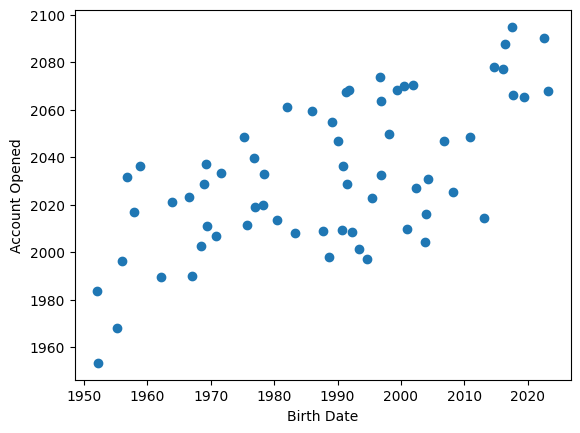

In [205]:
import matplotlib.pyplot as plt

ax = plt.gca() # get an "Axes" object to draw on; gca stands for "get current Axes"
ax.scatter(df_bank_datefix["BirthDate"], df_bank_datefix["AccountOpened"]) # create a scatter plot based on these two dates
ax.set_ylabel("Account Opened") # label the y axis
ax.set_xlabel("Birth Date") # label the x axis

The above graph shows lots of future account opened date which are wrong.

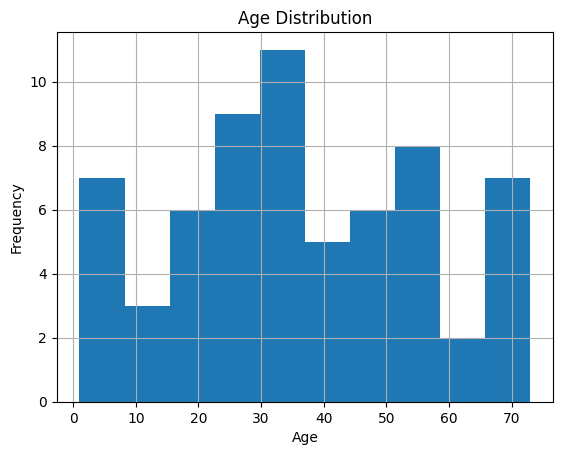

In [209]:
ax =df_bank_datefix['Age'].hist(bins=10)
# Label the axes and title
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Age Distribution')

# Show the plot
plt.show()

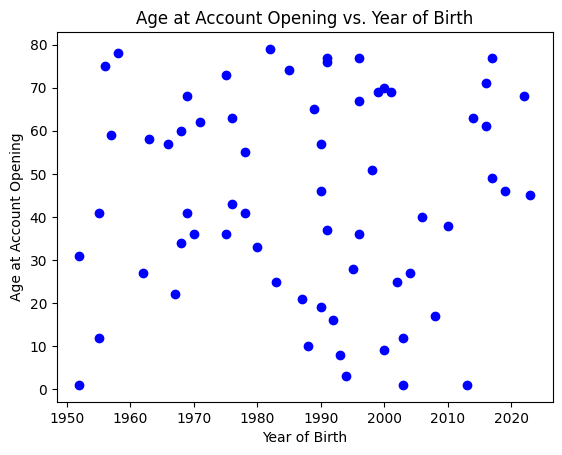

In [ ]:
# Convert 'BirthDate' and 'AccountOpened' to datetime
#df_bank_datefix['BirthDate'] = pd.to_datetime(df['BirthDate'])
#df_bank_datefix['AccountOpened'] = pd.to_datetime(df['AccountOpened'])

df_bank_datefix['BirthYear'] = df_bank_datefix['BirthDate'].dt.year
df_bank_datefix['AgeAtAccountOpening'] = df_bank_datefix['AccountOpened'].dt.year - df_bank_datefix['BirthYear']

# # Create a line plot
plt.scatter(df_bank_datefix['BirthYear'], df_bank_datefix['AgeAtAccountOpening'], marker='o', linestyle='-', color='blue')

# # Label the axes and title
plt.xlabel('Year of Birth')
plt.ylabel('Age at Account Opening')
plt.title('Age at Account Opening vs. Year of Birth')

# # Show the plot
plt.show()




This shows the distribution of age at account opening based on year of birth. It tells the customer who were born between 1990 and 2000 became customers of the bank at very young age, so around that time lots of young customer liked the bank.

As we have seen in the EDA done above, here also we can see some invalid future Account Open Dates

# 4. Storytelling With Data graph

Choose any graph in the Introduction of Storytelling With Data.  Using matplotlib to reproduce it in a rough way.  I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph.  However, if you're excited about learning to use matplotlib, this is a good way to do that.  You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

Text(0.5, 0, 'Birth Date')

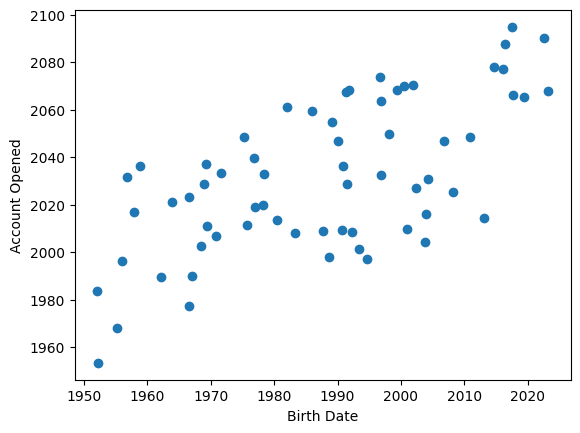

In [174]:
import matplotlib.pyplot as plt

ax = plt.gca() # get an "Axes" object to draw on; gca stands for "get current Axes"
ax.scatter(df_bank_datefix["BirthDate"], df_bank_datefix["AccountOpened"]) # create a scatter plot based on these two dates
ax.set_ylabel("Account Opened") # label the y axis
ax.set_xlabel("Birth Date") # label the x axis